# HONR 39900 Fall 2021: Foundations of Geospatial Analytics
## Week 11 Class Notebook
## Map Matching with HMMs

### Justin A. Gould (gould29@purdue.edu)

# Agenda and Goals
We will be working through the tutorials within `leuvenmapmatching`'s documentation: https://leuvenmapmatching.readthedocs.io/en/latest/index.html

While we will begin with trivial and arbitrary examples, your goal will be to apply the map matching to real-world data in this week's homework assignment.

### `smopy` is a requirement for the visualization capabilities of `leuvenmapmatching`

In [5]:
!pip install smopy

### `osmread`, `gpxpy`, and `rtree` required to interact with OSM maps and data

In [16]:
!pip install osmread

     |████████████████████████████████| 117 kB 1.0 MB/s eta 0:00:01
  Created wheel for osmread: filename=osmread-0.2-py3-none-any.whl size=15526 sha256=4f32af2b32e9ce0318fc6735461ca2a72175b5b1185ed3b584f958a6e1adeeed
  Stored in directory: /Users/gould29/Library/Caches/pip/wheels/bf/de/a4/12cecd49086a78057b0d4f6ef0b48cfa94e12c629e70a17850
  Created wheel for protobuf: filename=protobuf-3.0.0b3-py3-none-any.whl size=152676 sha256=6c6594c34d67ba6e3863d67a84172237bc38302fbd3235a1d225ed036df3badf
  Stored in directory: /Users/gould29/Library/Caches/pip/wheels/08/5a/70/e4b5405e80dff93aab38b4576d022f3b743fbdf5f281e47747
Successfully built osmread protobuf


In [30]:
!pip install gpxpy

     |████████████████████████████████| 105 kB 1.2 MB/s eta 0:00:01
  Created wheel for gpxpy: filename=gpxpy-1.4.2-py3-none-any.whl size=42543 sha256=1e805415030459dc0af2d4995e63466eb74342271cd8569a28c2692563cdb73f
  Stored in directory: /Users/gould29/Library/Caches/pip/wheels/e9/1b/e8/1e95d95fb1af470b278323a5564f4508f64c2aa476e4547f63
Successfully built gpxpy


In [23]:
!pip install rtree

     |████████████████████████████████| 426 kB 1.6 MB/s eta 0:00:01


### `pyproj` is required for dealing with some lat/long data

In [53]:
!pip install pyproj

# Required Packages

In [54]:
#General
import leuvenmapmatching
import osmread
from pathlib import Path
import requests
import rtree
import pyproj

#Visualization
from leuvenmapmatching import visualization as mmviz

#Examples
from leuvenmapmatching.matcher.distance import DistanceMatcher
from leuvenmapmatching.map.inmem import InMemMap
from leuvenmapmatching.util.gpx import gpx_to_path

# Example 1: Simple
https://leuvenmapmatching.readthedocs.io/en/latest/usage/introduction.html#example-1-simple \
A first, simple example. Some parameters are given to tune the algorithm. The `max_dist` and `obs_noise` are distances that indicate the maximal distance between observation and road segment and the expected noise in the measurements, respectively. The `min_prob_norm` prunes the lattice in that it drops paths that drop below 0.5 normalized probability. The probability is normalized to allow for easier reasoning about the probability of a path. It is computed as the exponential smoothed log probability components instead of the sum as would be the case for log likelihood.

In [3]:
#Define an Arbitrary Map
map_con = InMemMap("mymap", graph={
    "A": ((1, 1), ["B", "C", "X"]),
    "B": ((1, 3), ["A", "C", "D", "K"]),
    "C": ((2, 2), ["A", "B", "D", "E", "X", "Y"]),
    "D": ((2, 4), ["B", "C", "F", "E", "K", "L"]),
    "E": ((3, 3), ["C", "D", "F", "Y"]),
    "F": ((3, 5), ["D", "E", "L"]),
    "X": ((2, 0), ["A", "C", "Y"]),
    "Y": ((3, 1), ["X", "C", "E"]),
    "K": ((1, 5), ["B", "D", "L"]),
    "L": ((2, 6), ["K", "D", "F"])
}, use_latlon=False)

#Define GPS Points to Map Match
path = [(0.8, 0.7), (0.9, 0.7), (1.1, 1.0), (1.2, 1.5), (1.2, 1.6), (1.1, 2.0),
        (1.1, 2.3), (1.3, 2.9), (1.2, 3.1), (1.5, 3.2), (1.8, 3.5), (2.0, 3.7),
        (2.3, 3.5), (2.4, 3.2), (2.6, 3.1), (2.9, 3.1), (3.0, 3.2),
        (3.1, 3.8), (3.0, 4.0), (3.1, 4.3), (3.1, 4.6), (3.0, 4.9)]

matcher = DistanceMatcher(map_con, max_dist=2, obs_noise=1, min_prob_norm=0.5)
states, _ = matcher.match(path)
nodes = matcher.path_pred_onlynodes

print("States\n------")
print(states)
print("Nodes\n------")
print(nodes)
print("")
matcher.print_lattice_stats()

/Users/gould29/opt/anaconda3/envs/honr490/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/gould29/opt/anaconda3/envs/honr490/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
Searching closeby nodes with linear search, use an index and set max_dist


States
------
[('X', 'A'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('B', 'D'), ('B', 'D'), ('B', 'D'), ('B', 'D'), ('D', 'E'), ('D', 'E'), ('D', 'E'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F')]
Nodes
------
['X', 'A', 'B', 'D', 'E', 'F']

Stats lattice
-------------
nbr levels               : 22
nbr lattice              : 1002
avg lattice[level]       : 45.54545454545455
min lattice[level]       : 7
max lattice[level]       : 97
avg obs distance         : 0.15514927458475236
last logprob             : -0.5464565099511667
last length              : 22
last norm logprob        : -0.024838932270507576


Now, we will visualize the above map, via https://leuvenmapmatching.readthedocs.io/en/latest/usage/visualisation.html

In [7]:
mmviz.plot_map(map_con, matcher=matcher,
               show_labels=True, show_matching=True, show_graph=True,
               filename="example_1_plot.png")

(None, None)

## The file should look like:
![Example 1 Image](example_1_plot.png)

Let's try visualizing an overlay of `OpenStreetMaps`:

Lowered zoom level to keep map size reasonable. (z = 7)


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7fb09be5dc50>)

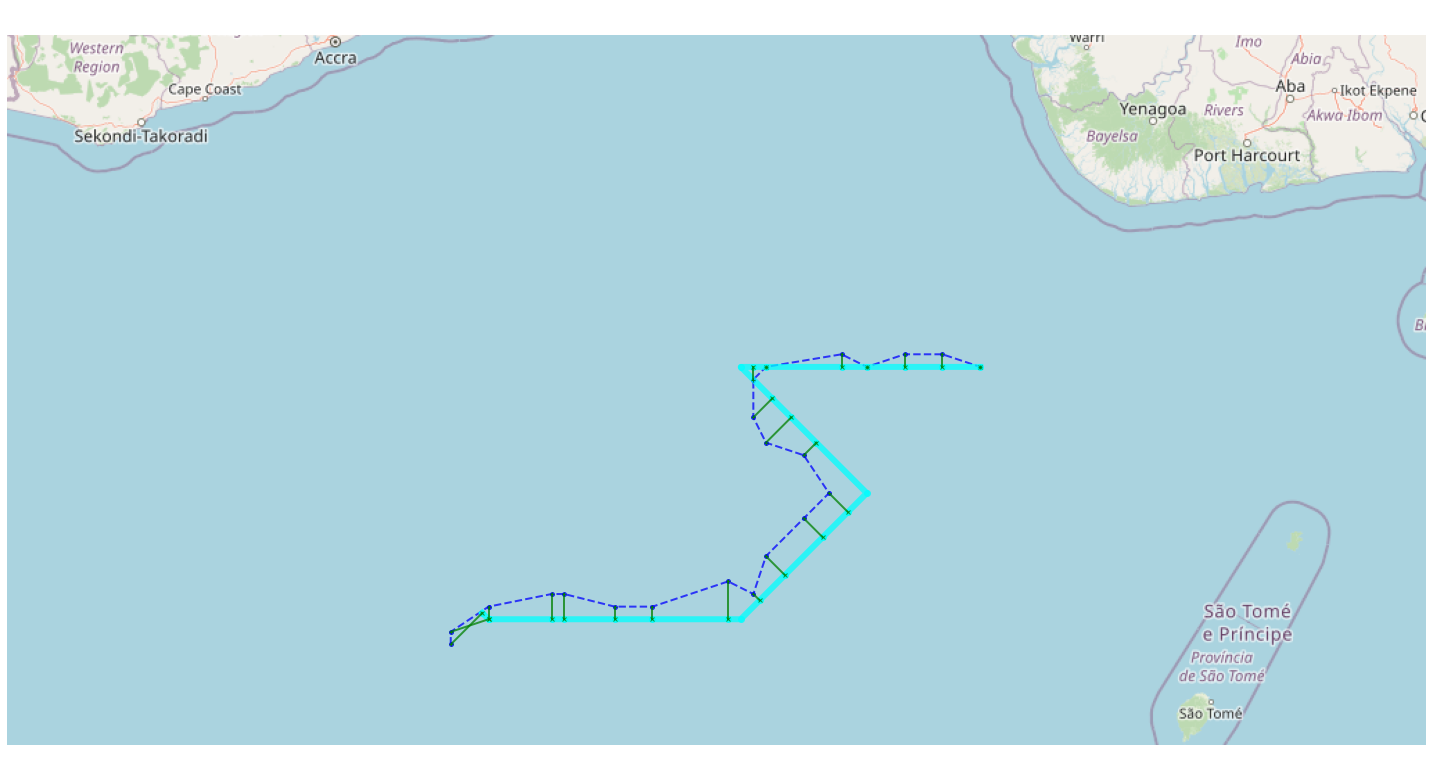

In [12]:
mmviz.plot_map(map_con, matcher=matcher,
                use_osm=True, zoom_path=True,
                show_labels=False, show_matching=True, show_graph=False,
                filename="example_1_osm_plot.png")

# Example 2: Non-emitting States
https://leuvenmapmatching.readthedocs.io/en/latest/usage/introduction.html#example-2-non-emitting-states \
In case there are less observations that states (an assumption of HMMs), non-emittings states allow you to deal with this. States will be inserted that are not associated with any of the given observations if this improves the probability of the path.

It is possible to also associate a distribtion over the distance between observations and the non-emitting states (`obs_noise_ne`). This allows the algorithm to prefer nearby road segments. This value should be larger than `obs_noise` as it is mapped to the line between the previous and next observation, which does not necessarily run over the relevant segment. Setting this to infinity is the same as using pure non-emitting states that ignore observations completely.

In [14]:
#Define Points to Map Match
path = [(1, 0), (7.5, 0.65), (10.1, 1.9)]

#Define a Map to which Points are Mapped
mapdb = InMemMap("mymap", graph={
    "A": ((1, 0.00), ["B"]),
    "B": ((3, 0.00), ["A", "C"]),
    "C": ((4, 0.70), ["B", "D"]),
    "D": ((5, 1.00), ["C", "E"]),
    "E": ((6, 1.00), ["D", "F"]),
    "F": ((7, 0.70), ["E", "G"]),
    "G": ((8, 0.00), ["F", "H"]),
    "H": ((10, 0.0), ["G", "I"]),
    "I": ((10, 2.0), ["H"])
}, use_latlon=False)

matcher = DistanceMatcher(mapdb, max_dist_init=0.2, obs_noise=1, obs_noise_ne=10,
                          non_emitting_states=True, only_edges=True)
states, _ = matcher.match(path)
nodes = matcher.path_pred_onlynodes

print("States\n------")
print(states)
print("Nodes\n------")
print(nodes)
print("")
matcher.print_lattice_stats()

mmviz.plot_map(mapdb, matcher=matcher,
              show_labels=True, show_matching=True,
              filename="example_2_plot.png")

/Users/gould29/opt/anaconda3/envs/honr490/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/gould29/opt/anaconda3/envs/honr490/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
Searching closeby nodes with linear search, use an index and set max_dist


States
------
[('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I')]
Nodes
------
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

Stats lattice
-------------
nbr levels               : 3
nbr lattice              : 40
avg lattice[level]       : 13.333333333333334
min lattice[level]       : 8
max lattice[level]       : 16
avg obs distance         : 0.26790850746762634
last logprob             : -2.373678241605297
last length              : 3
last norm logprob        : -0.791226080535099


(None, None)

## The file should look like:
<img src="example_2_plot.png" alt="drawing" height="50"/>

# Using OSM and Applying a Sample GPS Trace Trip (Walking): Detroit, MI
https://leuvenmapmatching.readthedocs.io/en/latest/usage/openstreetmap.html \
The next section requires OSM data. OSM is open source maps and map data. Free!

## Download a Sample Map

In [37]:
xml_file = Path(".") / "sample_osm.xml"
url = 'http://overpass-api.de/api/map?bbox=-83.0680102,42.3510973,-82.9575603,42.357894'
r = requests.get(url, stream=True)
with xml_file.open('wb') as ofile:
    for chunk in r.iter_content(chunk_size=1024):
        if chunk:
            ofile.write(chunk)

## Create Graph
Once we have a file containing the region we are interested in, we can select the roads we want to use to create a graph from. In this case we focus on ‘ways’ with a ‘highway’ tag. Those represent a variety of roads. For a more detailed filtering look at the [possible values of the highway tag](https://wiki.openstreetmap.org/wiki/Key:highway).

In [48]:
#Create Map Connection via OSM
map_con = InMemMap("myosm", use_latlon=True, use_rtree=False, index_edges=True)

for entity in osmread.parse_file(str(xml_file)):
    if isinstance(entity, osmread.Way) and 'highway' in entity.tags:
        for node_a, node_b in zip(entity.nodes, entity.nodes[1:]):
            map_con.add_edge(node_a, node_b)
            # Some roads are one-way. We'll add both directions.
            map_con.add_edge(node_b, node_a)
    if isinstance(entity, osmread.Node):
        map_con.add_node(entity.id, (entity.lat, entity.lon))
map_con.purge()

/Users/gould29/opt/anaconda3/envs/honr490/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/gould29/opt/anaconda3/envs/honr490/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


## Map Match from OSM

In [49]:
%%time
#Read Traces
track = gpx_to_path("mytrack.gpx")

#Remove Extra `None` from track
track = [(lambda x: x[0:2])(x) for x in track]

matcher = DistanceMatcher(map_con,
                         max_dist=100, max_dist_init=25,  # meter
                         min_prob_norm=0.001,
                         non_emitting_length_factor=0.75,
                         obs_noise=50, obs_noise_ne=75,  # meter
                         dist_noise=50,  # meter
                         non_emitting_states=True)
states, lastidx = matcher.match(track)

Searching closeby nodes with linear search, use an index and set max_dist


CPU times: user 2min 10s, sys: 1.61 s, total: 2min 12s
Wall time: 2min 35s


In [74]:
track

[(42.355618, -83.054237),
 (42.35562, -83.054238),
 (42.355615, -83.054253),
 (42.355684, -83.054297),
 (42.355719, -83.054198),
 (42.355781, -83.054022),
 (42.355749, -83.054001),
 (42.355781, -83.054022),
 (42.355719, -83.054198),
 (42.35565, -83.054155),
 (42.355587, -83.054116),
 (42.355656, -83.053914),
 (42.35573, -83.053715),
 (42.355749, -83.053728),
 (42.35573, -83.053715),
 (42.355656, -83.053914),
 (42.355722, -83.05396),
 (42.355839, -83.053635),
 (42.355918, -83.053637),
 (42.355993, -83.053428),
 (42.355967, -83.053411),
 (42.355993, -83.053428),
 (42.355918, -83.053637),
 (42.355839, -83.053635),
 (42.355886, -83.053504),
 (42.355999, -83.053194),
 (42.356038, -83.053086),
 (42.356027, -83.053079),
 (42.356038, -83.053086),
 (42.356105, -83.052904),
 (42.356126, -83.052918),
 (42.356105, -83.052904),
 (42.355999, -83.053194),
 (42.355933, -83.053149),
 (42.35602, -83.052916),
 (42.35609, -83.052727),
 (42.356102, -83.052735),
 (42.35609, -83.052727),
 (42.35602, -83.0529

## Visualize Results

Lowered zoom level to keep map size reasonable. (z = 17)


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7fb0a2b7be10>)

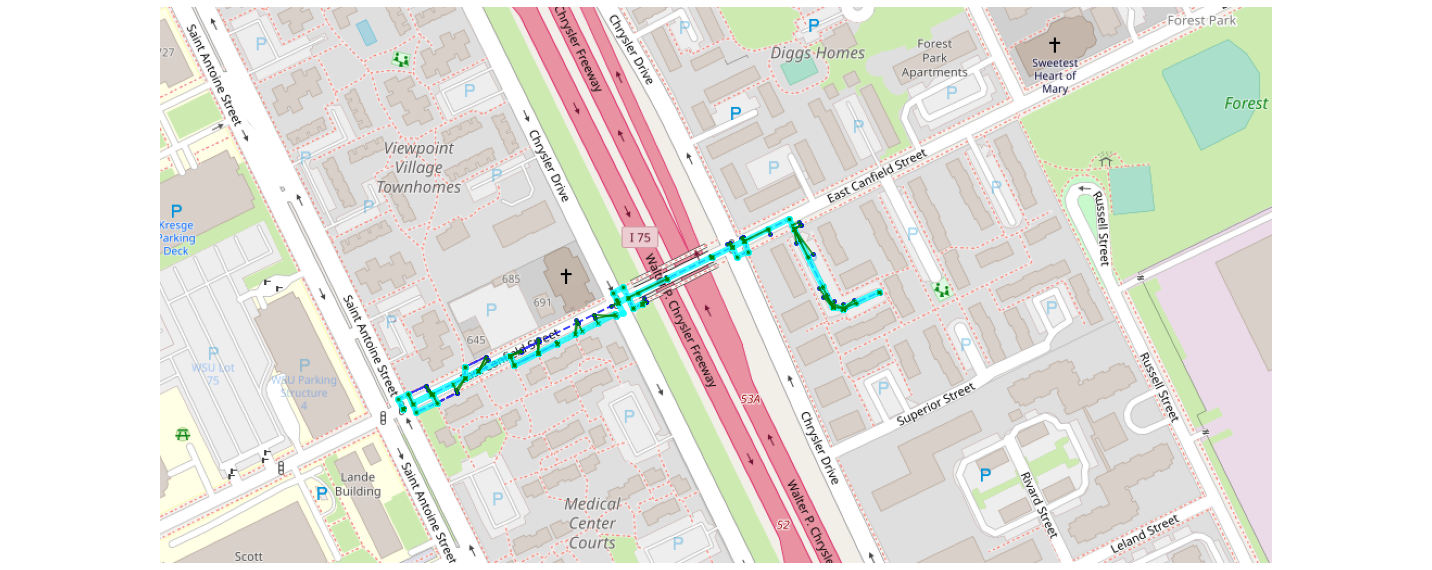

In [51]:
mmviz.plot_map(map_con, matcher=matcher,
                use_osm=True, zoom_path=True,
                show_labels=False, show_matching=True, show_graph=False,
                filename="example_3_osm_plot.png")

Look at the blue lines and green arrows to see projections made by the model. The light blue line represents the predicted path...points matched to our map. For reference, here is what the points look like just mapped out:

![](./wkt_of_gpx.png)

# Apply to Latitude/Lognitude Data - (Back to the Documentation Demo!)
https://leuvenmapmatching.readthedocs.io/en/latest/usage/latitudelongitude.html \
The toolbox can deal with latitude-longitude coordinates directly. Map matching, however, requires a lot of repeated computations between points and latitude-longitude computations will be more expensive than Euclidean distances.

There are three different options how you can handle latitude-longitude coordinates:
1. Use Lat/Long Directly
2. Project Lat/Long to X/Y
3. Use Lat/Long as if they were X/Y

# Option 1: Use Lat/Long Directly
https://leuvenmapmatching.readthedocs.io/en/latest/usage/latitudelongitude.html#option-1-use-latitude-longitude-directly \
Set the `use_latlon` flag in the Map to true.

For example to read in an `OpenStreetMap` file directly to a `InMemMap` object:

**This is the same as above, so we will skip it**

# Option 2: Project Lat/Long to X/Y
https://leuvenmapmatching.readthedocs.io/en/latest/usage/latitudelongitude.html#option-2-project-latitude-longitude-to-x-y \

Latitude-Longitude coordinates can be transformed two a frame with two orthogonal axis.

In [52]:
map_con_latlon = InMemMap("myosm", use_latlon=True)
# Add edges/nodes
map_con_xy = map_con_latlon.to_xy()

route_latlon = []
# Add GPS locations
route_xy = [map_con_xy.latlon2yx(latlon) for latlon in route_latlon]

/Users/gould29/opt/anaconda3/envs/honr490/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/gould29/opt/anaconda3/envs/honr490/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/gould29/opt/anaconda3/envs/honr490/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the prefer

This can also be done directly using the pyproj toolbox. For example, using the Lambert Conformal projection to project the route GPS coordinates:

In [66]:
route = [(4.67878,50.864),(4.68054,50.86381),(4.68098,50.86332),(4.68129,50.86303),(4.6817,50.86284),
         (4.68277,50.86371),(4.68894,50.86895),(4.69344,50.86987),(4.69354,50.86992),(4.69427,50.87157),
         (4.69643,50.87315),(4.69768,50.87552),(4.6997,50.87828)]
lon_0, lat_0 = route[0]
proj = pyproj.Proj(f"+proj=merc +ellps=GRS80 +units=m +lon_0={lon_0} +lat_0={lat_0} +lat_ts={lat_0} +no_defs")
xs, ys = [], []
for lon, lat in route:
    x, y = proj(lon, lat)
    xs.append(x)
    ys.append(y)

#Create Set of GPS Points Converted to GRS80
to_map = []
for x, y in zip(xs, ys):
    to_map.append((x, y))

to_map

[(0.0, 4151393.067831352),
 (123.90874196328781, 4151371.931197072),
 (154.88592745410978, 4151317.4213293632),
 (176.71076268625436, 4151285.160658549),
 (205.57586734820242, 4151264.024466364),
 (280.9067502462715, 4151360.8066874975),
 (715.2913740607927, 4151943.763296859),
 (1032.1034983987597, 4152046.121256038),
 (1039.1437678284515, 4152051.684246792),
 (1090.537734665558, 4152235.266307333),
 (1242.60755434778, 4152411.0661618263),
 (1330.6109222194282, 4152674.7771780347),
 (1472.8243647000147, 4152981.9006716586)]

# Option 3: Use Lat/Long as if they were X/Y
https://leuvenmapmatching.readthedocs.io/en/latest/usage/latitudelongitude.html#option-3-use-latitude-longitude-as-if-they-are-x-y-points \
A naive solution would be to use latitude-longitude coordinate pairs as if they are X-Y coordinates. For small distances, far away from the poles and not crossing the dateline, this option might work. But it is not adviced.

For example, for long distances the error is quite large. In the image beneath, the blue line is the computation of the intersection using latitude-longitude while the red line is the intersection using Eucludean distances.

![](https://people.cs.kuleuven.be/~wannes.meert/leuvenmapmatching/latlon_mismatch_1.png?v=1)

![](https://people.cs.kuleuven.be/~wannes.meert/leuvenmapmatching/latlon_mismatch_2.png?v=1)